<a href="https://colab.research.google.com/github/leodavidfan/AI_Books/blob/main/HW6_Fan_Li.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment 6: Discrete Probability Distributions in Machine Learning**

**Q1. Expected Value and Variance (10 points)
A data scientist is analyzing user behavior on a website. Each user’s session can be modeled
as follows:
• 60% chance of viewing only one page
• 30% chance of viewing two pages
• 10% chance of viewing three pages
(a) Define the random variable and its probability mass function
(b) Calculate the expected number of pages viewed per session
(c) Calculate the variance in the number of pages viewed
(d) Explain what these metrics tell us about user behavior**

**(a) Define the random variable and its probability mass function**

In [13]:
P_X1 = 0.60
P_X2 = 0.30
P_X3 = 0.10

**(b) Calculate the expected number of pages viewed per session**

In [14]:
E_X = 1*P_X1 + 2*P_X2 + 3*P_X3
print('mean: ', E_X)

mean:  1.5


**(c) Calculate the variance in the number of pages viewed**

In [15]:
E_X2 = 1**2*P_X1 + 2**2*P_X2 + 3**2*P_X3
VAR_X = E_X2 - E_X**2
print("variance:", VAR_X)

variance: 0.44999999999999973


**(d) Explain what these metrics tell us about user behavior**

**• The average user views 1.5 pages per session, indicating most users do not explore deeply into the website.**

Correct
Reason:
1. According to data from Littledata, the average "user view per session" (also known as "pages per session") is around 2.6 pages per session


**• The relatively small variance (0.45) suggests that user behavior is fairly consistent.**

Correct.
Reason:
1. 0.45 is relatively small value for variance


**• The distribution is right-skewed, with a small percentage of users viewing more pages.**

Correct.
Reason:
1. Right-skewed Distribution: When the distribution has a long tail towards the right side, then it is known as a right-skewed or positive-skewed distribution.
2. P(X=1)=0.6 > P(X=2)=0.3 > P(X=3)=0.1, long tail



**Q2. Bernoulli Distribution in A/B Testing (25 points)
You’re running an A/B test for a new website design. The current design has a conversion
rate of 12%.
(a) Model this as a Bernoulli distribution and write its PMF (5 points)
(b) If you observe 1000 visitors, what’s the expected number of conversions? (5 points)
(c) What’s the variance in the number of conversions? (5 points)
(d) Write a Python function that simulates this experiment 1000 times and plots the
distribution of results (10 points)**

**(a) Model this as a Bernoulli distribution and write its PMF (5 points)**
Wrong. This is not Bernoulli distribution, but a Binominal distribution, which represents p is the discrete successful rate in a sequence of n independent experiments, while bernoulli is the individual experiment with p is the discrete successful rate for yes and no decisions.


**(b) If you observe 1000 visitors, what’s the expected number of conversions? (5 points)**
The expected number of conversion is the expected value. From simulation, Mean conversions: 119.19. From hand calculation, Mean conversions: n*p = 1,000 * 12% = 120. The discrepancy is introduced by computation.


**(c) What’s the variance in the number of conversions? (5 points)**
From hand calculation, the variance is n*p(1-p)=1,000*12%*(1-12%) = 1000*0.12*(1-0.12) = 105.6. From simulation, the variance is Variance conversions: 104.69, which is the square of std. The discrepancy is introduced by computation.


**(d) Write a Python function that simulates this experiment 1000 times and plots the distribution of results (10 points)**
Shown in the histgram plot.



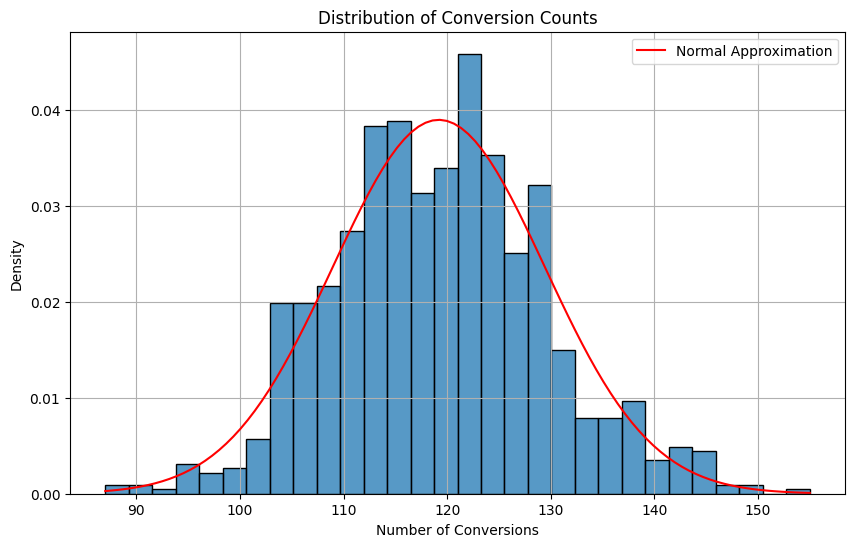

Mean conversions: 119.19
Standard deviation: 10.23
Variance conversions: 104.69


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

def simulate_ab_test(n_visitors=1000, conv_rate=0.12, n_simulations=1000):
  # Set the seed value
  np.random.seed(42)

  # Run simulations
  results = np.random.binomial(n=n_visitors, p=conv_rate, size=n_simulations)

  # Plot distribution
  plt.figure(figsize=(10, 6))

  sns.histplot(results, stat='density', bins=30)
  # Add normal approximation curve
  x = np.linspace(results.min(), results.max(), 100)
  y = np.exp(-(x - np.mean(results))**2 / (2 * np.var(results))) \
    / np.sqrt(2 * np.pi * np.var(results))
  plt.plot(x, y, 'r-', label='Normal Approximation')

  plt.title('Distribution of Conversion Counts')
  plt.xlabel('Number of Conversions')
  plt.ylabel('Density')
  plt.legend()
  plt.grid(True)
  plt.show()

  return results

# Run simulation
results = simulate_ab_test()
print(f"Mean conversions: {np.mean(results):.2f}")
print(f"Standard deviation: {np.std(results):.2f}")

# added calculcation
print(f"Variance conversions: {np.std(results)**2:.2f}")

**Q3. Binomial Distribution Application (25 points)
A machine learning model correctly classifies emails as spam with 95% accuracy. You test
it on a batch of 200 emails.
(a) What distribution would you use to model the number of correct classifications? Justify
your answer. (5 points)
(b) Calculate the probability of getting exactly 190 correct classifications (5 points)
(c) What’s the probability of getting 185 or more correct classifications? (10 points)
(d) If you needed to guarantee 90% accuracy with 95% confidence, how many emails would
you need to test? (5 points)**

**Q4. Poisson Distribution in Practice (30 points)
A website receives an average of 8 API requests per minute.
(a) Write the PMF for this scenario (5 points)
(b) Calculate the probability of receiving:
• Exactly 5 requests in a minute (5 points)
• More than 10 requests in a minute (5 points)
• No requests in a minute (5 points)
(c) Write a Python function that:
• Simulates request arrivals for 60 minutes
• Plots the distribution of inter-arrival times
• Compares the simulated distribution to the theoretical Poisson distribution (10
points)**

**Q5. Overdispersion (10 points)
Explain how you would modify your analysis if you discovered that the API requests showed
signs of overdispersion (variance > mean). What alternative distribution might be more
appropriate, and why?**

In [12]:
# debug
1000*0.12*(1-0.12)

105.6

In [ ]:
# (a) Define the random variable and its probability mass function
P_X1 = 0.60
P_X2 = 0.30
P_X3 = 0.10

# (b)
E_X = 1*P_X1 + 2*P_X2 + 3*P_X3
print('mean: ', E_X)

# (c)
E_X2 = 1**2*P_X1 + 2**2*P_X2 + 3**2*P_X3
VAR_X = E_X2 - E_X**2
print("variance:", VAR_X)